# Coincidence Timing
The purpose of this notebook is to outline coincidence timing, following Matt's work [here (login required)](https://zzz.physics.umn.edu/!cdms/cdms/k100/run_summary/run_76/coincidence_timing).

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
from R76Tools import *
plt.style.use('../default.mplstyle')

In [2]:
datapath = paths["fritts"]
ser = ["07220916_2059","07220916_2200","07220917_1039","07220917_1225","07220917_2125","07220917_2155"]
#lab = ["0V","-4V","-21V","-65V","-84V","-84V"]
ser = ser[1::2] #odd-numbered only
_,z = makechain_list(ser,path=datapath,filters=qualityfilters+["PTOFdelay"],aliases=qualityaliases)

In [3]:
for x in z:
    x["pt_keV_bscorr"] = x["pt_keV"]/(1-0.0461538*x["BSel"]/165)
    x["pt0_keV_bscorr"] = x["pt0_keV"]/(1-0.0461538*x["BSel"]/165)
    x["pt_keVee"] = 14.0821*x["pt_keV_bscorr"]/(333.899 - x["pt_keV_bscorr"])
    x["pt0_keVee"] = 14.0821*x["pt0_keV_bscorr"]/(333.899 - x["pt0_keV_bscorr"])
z_all = pd.DataFrame(); #z4_all = pd.DataFrame()
for i,x in enumerate(z):
    z_all = pd.concat([z_all,x])

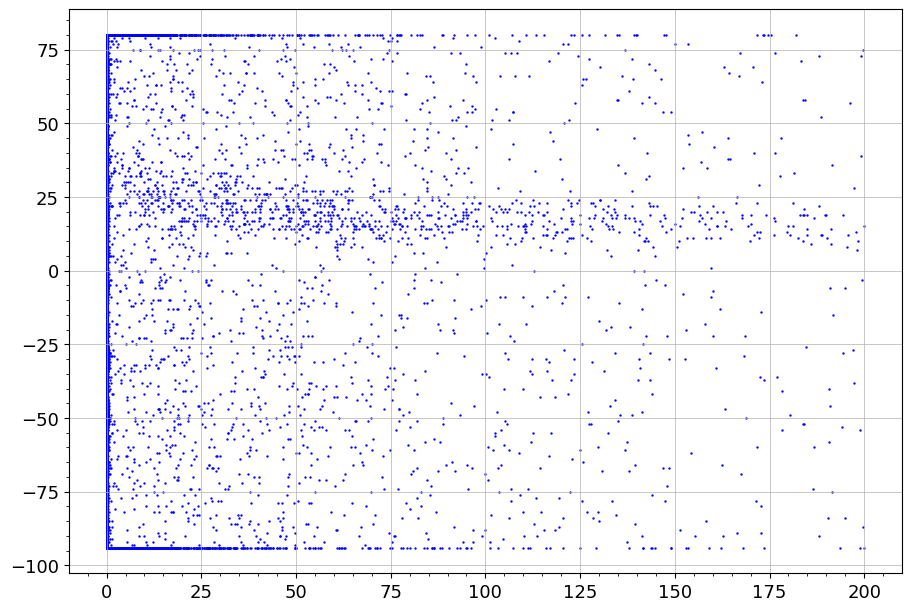

In [4]:
x = z_all
zcut = x[~x["crand"] & x["cbs"] & (x["pt_keVee"] > 0) & (x["pt_keVee"] < 200)]
plt.scatter(zcut["pt_keVee"],zcut["PTOFdelay"]/0.8e-6,s=0.5,color="blue")
plt.show()

In [5]:
for x in z:
    x["ccoin"] = (x["PTOFdelay"]/0.8e-6 > 8) & (x["PTOFdelay"]/0.8e-6 < 40)